In [15]:
import os
from PIL import Image
import numpy as np

In [16]:
i=0
imgs = []
for file in os.listdir('images/'):
    img = Image.open('images/'+file)
    img_grey = img.convert("L")
    img_grey = img_grey.resize((64,64))
    imgs.append(np.array(img_grey))
#     img_grey.save('gray/'+str(i)+'.jpg')
    i+=1

In [17]:
data = np.array(imgs)
data = np.expand_dims(data,axis=3)
data.shape

(240, 64, 64, 1)

In [18]:
import pandas as pd
target = pd.read_csv('target.csv')
target = target['Ra']
target.head(25)

0     1.446
1     2.051
2     2.598
3     3.087
4     2.273
5     2.989
6     2.168
7     2.637
8     2.413
9     1.748
10    1.709
11    1.416
12    1.524
13    2.207
14    1.846
15    1.514
16    1.826
17    1.797
18    1.573
19    1.651
20    1.651
21    1.797
22    1.709
23    2.872
24    2.471
Name: Ra, dtype: float64

In [19]:
data = data.copy()
target = target.copy()

Roughness :  2.872


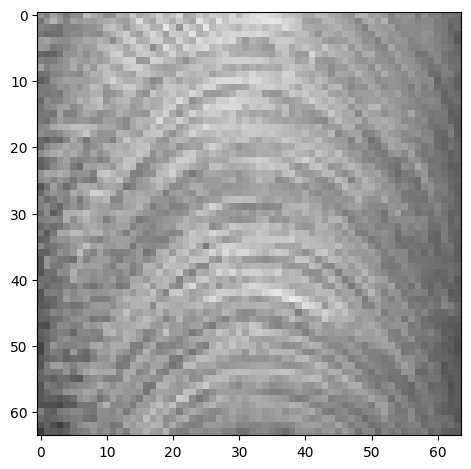

In [20]:
from skimage.io import imshow
imshow(data[23]);
print("Roughness : ",target[23])

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras.backend import sum,square,mean,epsilon

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

def r2_score(y_true,y_pred):
    u = sum(square(y_true-y_pred))
    v = sum(square(y_true-mean(y_true)))
    return (1-u/(v+epsilon()))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[r2_score])

# Train the model
history = model.fit(data, target, epochs=500, batch_size=32)

Epoch 1/500
8/8 [==============================] - 6s 137ms/step - loss: 12826.7725 - r2_score: -22928.4473
Epoch 2/500
8/8 [==============================] - 1s 148ms/step - loss: 10.9714 - r2_score: -13.7534
Epoch 3/500
8/8 [==============================] - 1s 163ms/step - loss: 2.0477 - r2_score: -1.9667
Epoch 4/500
8/8 [==============================] - 1s 189ms/step - loss: 0.8698 - r2_score: -0.3374
Epoch 5/500
8/8 [==============================] - 2s 188ms/step - loss: 0.8303 - r2_score: -0.2921
Epoch 6/500
8/8 [==============================] - 2s 198ms/step - loss: 0.7858 - r2_score: -0.2101
Epoch 7/500
8/8 [==============================] - 1s 174ms/step - loss: 0.7443 - r2_score: -0.1802
Epoch 8/500
8/8 [==============================] - 2s 191ms/step - loss: 0.7143 - r2_score: -0.1213
Epoch 9/500
8/8 [==============================] - 1s 127ms/step - loss: 0.7318 - r2_score: -0.1188
Epoch 10/500
8/8 [==============================] - 1s 131ms/step - loss: 0.7451 - r2_scor

8/8 [==============================] - 1s 139ms/step - loss: 0.2968 - r2_score: 0.5498
Epoch 83/500
8/8 [==============================] - 2s 200ms/step - loss: 0.2849 - r2_score: 0.5417
Epoch 84/500
8/8 [==============================] - 1s 179ms/step - loss: 0.2853 - r2_score: 0.5255
Epoch 85/500
8/8 [==============================] - 1s 172ms/step - loss: 0.3271 - r2_score: 0.4593
Epoch 86/500
8/8 [==============================] - 1s 180ms/step - loss: 0.2925 - r2_score: 0.5210
Epoch 87/500
8/8 [==============================] - 2s 214ms/step - loss: 0.2706 - r2_score: 0.5128
Epoch 88/500
8/8 [==============================] - 1s 152ms/step - loss: 0.3018 - r2_score: 0.5369
Epoch 89/500
8/8 [==============================] - 1s 144ms/step - loss: 0.3077 - r2_score: 0.5199
Epoch 90/500
8/8 [==============================] - 1s 136ms/step - loss: 0.2595 - r2_score: 0.5841
Epoch 91/500
8/8 [==============================] - 1s 146ms/step - loss: 0.2464 - r2_score: 0.6050
Epoch 92/500


8/8 [==============================] - 1s 142ms/step - loss: 0.0502 - r2_score: 0.9079
Epoch 164/500
8/8 [==============================] - 2s 196ms/step - loss: 0.0498 - r2_score: 0.9187
Epoch 165/500
8/8 [==============================] - 2s 192ms/step - loss: 0.0556 - r2_score: 0.9128
Epoch 166/500
8/8 [==============================] - 1s 172ms/step - loss: 0.0612 - r2_score: 0.9009
Epoch 167/500
8/8 [==============================] - 1s 176ms/step - loss: 0.0500 - r2_score: 0.9210
Epoch 168/500
8/8 [==============================] - 2s 200ms/step - loss: 0.0503 - r2_score: 0.9128
Epoch 169/500
8/8 [==============================] - 1s 161ms/step - loss: 0.0461 - r2_score: 0.9171
Epoch 170/500
8/8 [==============================] - 1s 145ms/step - loss: 0.0585 - r2_score: 0.8899
Epoch 171/500
8/8 [==============================] - 1s 156ms/step - loss: 0.0657 - r2_score: 0.8944
Epoch 172/500
8/8 [==============================] - 2s 198ms/step - loss: 0.0604 - r2_score: 0.9045
Epoc

8/8 [==============================] - 1s 184ms/step - loss: 0.0049 - r2_score: 0.9918
Epoch 245/500
8/8 [==============================] - 2s 201ms/step - loss: 0.0042 - r2_score: 0.9927
Epoch 246/500
8/8 [==============================] - 1s 130ms/step - loss: 0.0042 - r2_score: 0.9936
Epoch 247/500
8/8 [==============================] - 1s 118ms/step - loss: 0.0038 - r2_score: 0.9936
Epoch 248/500
8/8 [==============================] - 1s 138ms/step - loss: 0.0042 - r2_score: 0.9924
Epoch 249/500
8/8 [==============================] - 1s 142ms/step - loss: 0.0037 - r2_score: 0.9943
Epoch 250/500
8/8 [==============================] - 2s 226ms/step - loss: 0.0034 - r2_score: 0.9945
Epoch 251/500
8/8 [==============================] - 1s 168ms/step - loss: 0.0031 - r2_score: 0.9951
Epoch 252/500
8/8 [==============================] - 2s 190ms/step - loss: 0.0031 - r2_score: 0.9949
Epoch 253/500
8/8 [==============================] - 1s 176ms/step - loss: 0.0032 - r2_score: 0.9942
Epoc

8/8 [==============================] - 1s 157ms/step - loss: 1.9150e-04 - r2_score: 0.9996
Epoch 324/500
8/8 [==============================] - 1s 178ms/step - loss: 2.1104e-04 - r2_score: 0.9997
Epoch 325/500
8/8 [==============================] - 2s 190ms/step - loss: 2.1365e-04 - r2_score: 0.9997
Epoch 326/500
8/8 [==============================] - 2s 198ms/step - loss: 2.0849e-04 - r2_score: 0.9997
Epoch 327/500
8/8 [==============================] - 2s 193ms/step - loss: 1.9330e-04 - r2_score: 0.9997
Epoch 328/500
8/8 [==============================] - 2s 188ms/step - loss: 1.4903e-04 - r2_score: 0.9997
Epoch 329/500
8/8 [==============================] - 1s 156ms/step - loss: 1.5564e-04 - r2_score: 0.9997
Epoch 330/500
8/8 [==============================] - 1s 150ms/step - loss: 1.5865e-04 - r2_score: 0.9997
Epoch 331/500
8/8 [==============================] - 1s 150ms/step - loss: 1.6199e-04 - r2_score: 0.9997
Epoch 332/500
8/8 [==============================] - 1s 172ms/step - 

8/8 [==============================] - 1s 150ms/step - loss: 1.0422e-05 - r2_score: 1.0000
Epoch 402/500
8/8 [==============================] - 1s 141ms/step - loss: 7.5821e-06 - r2_score: 1.0000
Epoch 403/500
8/8 [==============================] - 1s 152ms/step - loss: 5.8448e-06 - r2_score: 1.0000
Epoch 404/500
8/8 [==============================] - 1s 170ms/step - loss: 4.8031e-06 - r2_score: 1.0000
Epoch 405/500
8/8 [==============================] - 2s 194ms/step - loss: 3.0757e-06 - r2_score: 1.0000
Epoch 406/500
8/8 [==============================] - 2s 189ms/step - loss: 3.2333e-06 - r2_score: 1.0000
Epoch 407/500
8/8 [==============================] - 2s 200ms/step - loss: 5.3158e-06 - r2_score: 1.0000
Epoch 408/500
8/8 [==============================] - 2s 189ms/step - loss: 3.4336e-06 - r2_score: 1.0000
Epoch 409/500
8/8 [==============================] - 1s 150ms/step - loss: 3.8064e-06 - r2_score: 1.0000
Epoch 410/500
8/8 [==============================] - 1s 148ms/step - 

8/8 [==============================] - 1s 166ms/step - loss: 4.1645e-08 - r2_score: 1.0000
Epoch 480/500
8/8 [==============================] - 1s 176ms/step - loss: 5.5543e-08 - r2_score: 1.0000
Epoch 481/500
8/8 [==============================] - 2s 209ms/step - loss: 1.4623e-07 - r2_score: 1.0000
Epoch 482/500
8/8 [==============================] - 2s 193ms/step - loss: 2.7867e-07 - r2_score: 1.0000
Epoch 483/500
8/8 [==============================] - 2s 196ms/step - loss: 4.3018e-07 - r2_score: 1.0000
Epoch 484/500
8/8 [==============================] - 1s 185ms/step - loss: 7.5413e-07 - r2_score: 1.0000
Epoch 485/500
8/8 [==============================] - 1s 148ms/step - loss: 4.4338e-07 - r2_score: 1.0000
Epoch 486/500
8/8 [==============================] - 1s 149ms/step - loss: 3.6066e-07 - r2_score: 1.0000
Epoch 487/500
8/8 [==============================] - 1s 169ms/step - loss: 5.3164e-07 - r2_score: 1.0000
Epoch 488/500
8/8 [==============================] - 1s 188ms/step - 

In [22]:
model.save('surface_model.h5')

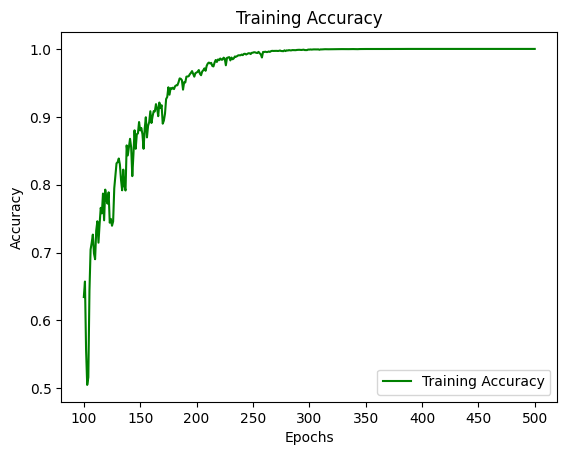

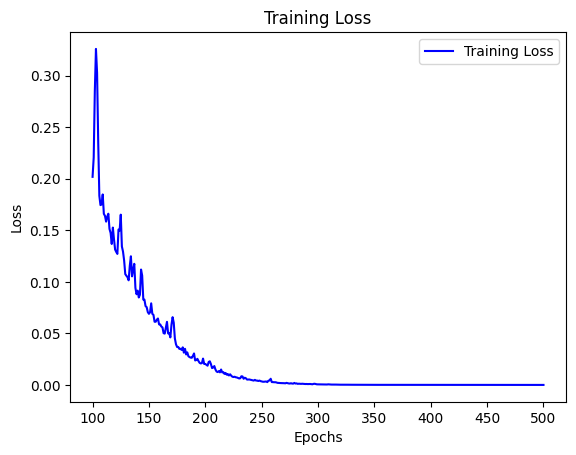

In [49]:
acc = history.history['r2_score']
acc = acc[99:501]
epochs = range(100,501)
plt.plot(epochs, acc, 'g', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss = history.history['loss']
loss = loss[99:501]
epochs = range(100,501)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## TESTING

In [23]:
img = Image.open('gray/238.jpg')
img_grey = img.convert("L")
img_grey = img_grey.resize((64,64))
imgs = np.array(img_grey)
data = np.reshape(imgs,(1,64,64,1))

In [7]:
from keras.models import load_model

def r2_score(y_true,y_pred):
    u = sum(square(y_true-y_pred))
    v = sum(square(y_true-mean(y_true)))
    return (1-u/(v+epsilon()))

model = load_model('surface_model.h5',custom_objects={"r2_score": r2_score})
img_pred = model.predict(data)

1/1 [==============================] - 2s 2s/step


In [8]:
print("Roughness : ",img_pred[0][0])

3.0726538